In [ ]:
'''
    常见编码方式:
    1)脉冲编码调变(PCM):直接将每个曲阳的振幅存档或传输至对方,这种编码方式效率不高。
    2)非线性PCM(Non-linear PCM): 因人类对高频信号较不敏感,故可以把高频信号以较低经度编码;反之,低频信号
    采用较高精度,可降低编码量
    3)可调变PCM(Adaptive PCM): 由于信号片段高低不一,因此不必统一编码,可以将信号切成很多段,并把每一段都分别
    编码,进行正规化(Regularization)后,再做PCM编码。

    音频文件的属性

    文件来源:https://github.com/maxifjaved/sample-files
'''
'''
    音频文件解析
'''
import IPython

wav_file = '../../sample-files/SAMPLE AUDIO FILES/WAV_1MG.wav'

IPython.display.Audio(wav_file,autoplay=True)

In [2]:
'''
    音频文件的属性
'''
import wave

f = wave.open(wav_file,'rb')
print(f'取样频率={f.getframerate()}, 帧数={f.getnframes()},' +
      f'声道 = {f.getnchannels()},精度={f.getsampwidth()}, ' +
      f'文件秒数={f.getnframes()/f.getframerate():.2f}')
f.close()


取样频率=8000, 帧数=268237,声道 = 2,经度=2, 文件秒数=33.53


In [5]:
'''
    4.串流播放
'''
import pyaudio
import wave  # Add this import

def PlayAudio(filename, seconds=1):
    # 定义串流区块大小(stream chunk)
    chunk = 1024
    # 开启音频文件
    f = wave.open(filename,'rb')
    # 初始化PyAudio
    p = pyaudio.PyAudio()

    # 开启串流
    stream = p.open(format=p.get_format_from_width(f.getsampwidth()),
                    channels=f.getnchannels(),
                    rate=f.getframerate(),
                    output=True)
    # 计算每秒区块数
    sample_count_per_second = f.getframerate() / chunk

    # 计算总区块数
    if seconds > 0:
        # 每秒播放的区块数 * 秒数
        total_chunk = sample_count_per_second * seconds
    else:
        # 总区块数 = 总帧数 / (采样率 * 声道数)
        total_chunk = (f.getnframes() / (f.getframerate() * f.getnchannels())) * sample_count_per_second

    print(f'每秒区块数={sample_count_per_second}, 总区块数={total_chunk}')

    # 每次读一个区块
    data = f.readframes(chunk)
    no = 0
    while data:
        # 播放区块
        stream.write(data)
        data = f.readframes(chunk)
        no += 1
        if seconds > 0 and no > total_chunk:
            break

    # 关闭串流
    stream.stop_stream()
    stream.close()
    # 关闭PyAudio
    p.terminate()

# 播放音频文件
wav_file = '../../sample-files/SAMPLE AUDIO FILES/WAV_1MG.wav'
# 5.播放音频文件
PlayAudio(wav_file, seconds=-1)

每秒区块数=7.8125, 总区块数=130.97509765625


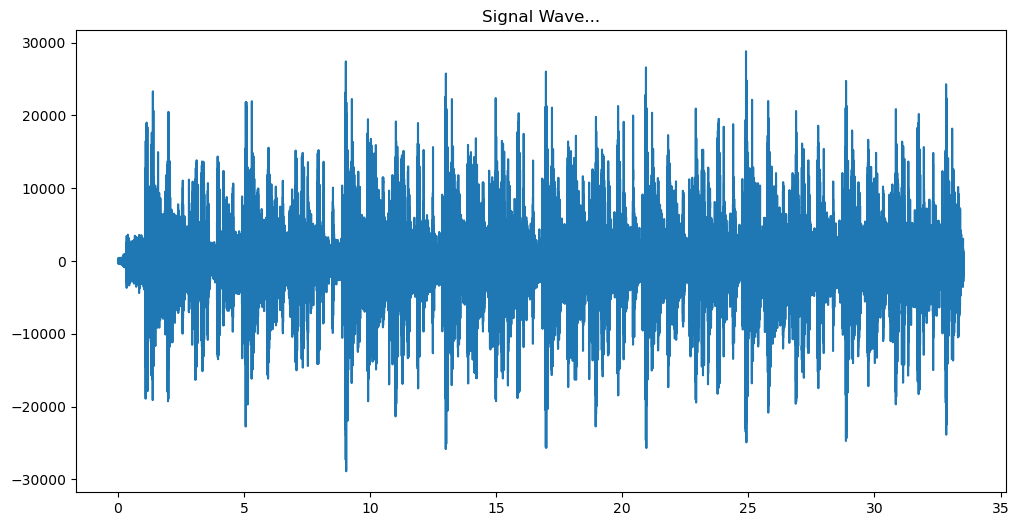

In [8]:
'''
6.绘制波形:由于多声道wav文件格式是交错存储的,先说明比较单纯的单声道wav文件读取。
'''
import numpy as np
import wave
import sys
import matplotlib.pyplot as plt

# 读取绘制单声道WAV文件
def DrawWavFile_mono(filename):
    # 打开音频文件对象
    f = wave.open(filename, 'rb')

    # 读取帧数据
    signal = f.readframes(-1)
    signal = np.frombuffer(signal, np.int16)  # Replace np.fromstring with np.frombuffer

    fs = f.getframerate()

    # 计算音频时长及绘制
    if f.getnchannels() == 1:
        Time = np.linspace(0, len(signal) / fs, num=len(signal))

        # 绘图
        plt.figure(figsize=(12, 6))
        plt.title("Signal Wave...")
        plt.plot(Time, signal)
        plt.show()
    else:
        print("非单声道无法绘制")

# 测试
wav_file = "../../sample-files/SAMPLE AUDIO FILES/down.wav"
DrawWavFile_mono(wav_file)

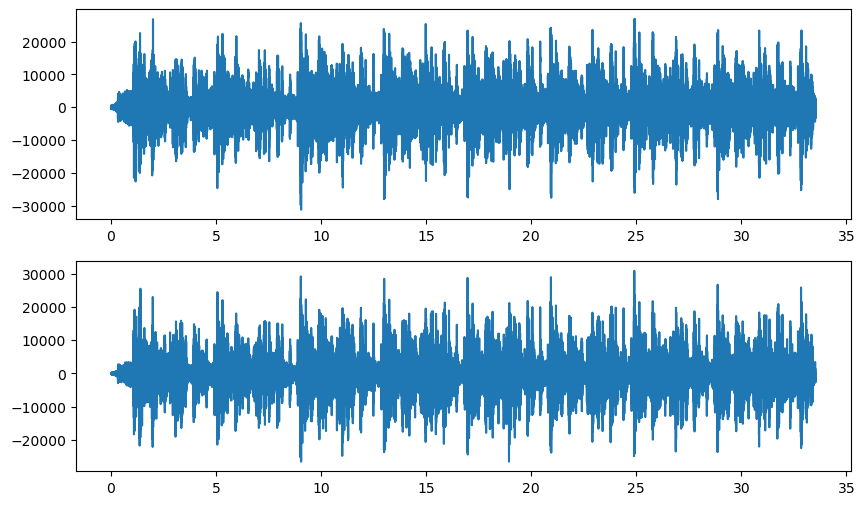

In [1]:
'''
    多声道绘制波形函数
'''
import wave
import numpy as np
import matplotlib.pyplot as plt

def DrawWAVFile_stereo(FILENAME):
    # 打开WAV文件
    with wave.open(FILENAME, 'r') as wav_file:
        # 读取音频数据
        signal = wav_file.readframes(-1)
        signal = np.frombuffer(signal, np.int16)

        # 分别存储每个声道的数据到一个List
        channels = [[] for channel in range(wav_file.getnchannels())]

        # 将数据按声道存入对应的List
        for index, datum in enumerate(signal):
            channels[index % len(channels)].append(datum)

        # 计算时间轴
        fs = wav_file.getframerate()
        Time = np.linspace(0, len(signal) / len(channels) / fs, num=int(len(signal) / len(channels)))

        # 创建子图
        f, ax = plt.subplots(nrows=len(channels), ncols=1, figsize=(10, 6))  # 修改为 plt.subplots
        for i, channel in enumerate(channels):
            if len(channels) == 1:
                ax.plot(Time, channel)
            else:
                ax[i].plot(Time, channel)

wav_file = '../../sample-files/SAMPLE AUDIO FILES/WAV_1MG.wav'
DrawWAVFile_stereo(wav_file)

=====================多声道======================
=====================单声道=====================


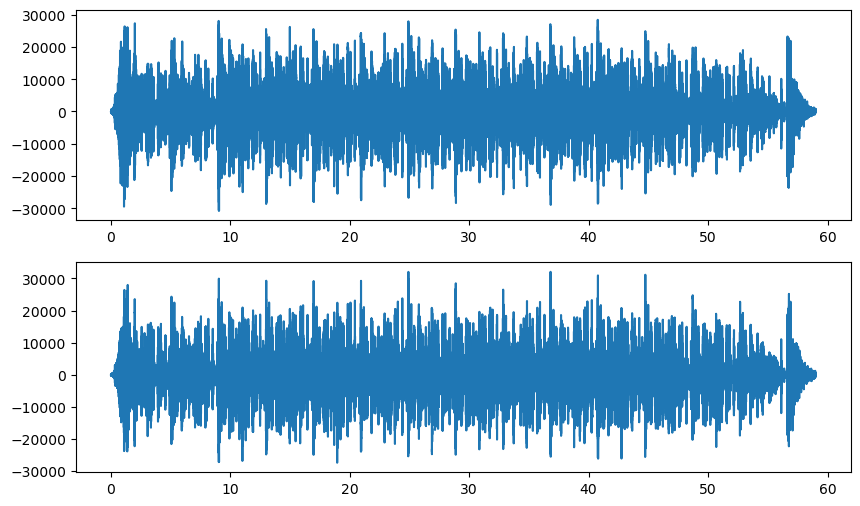

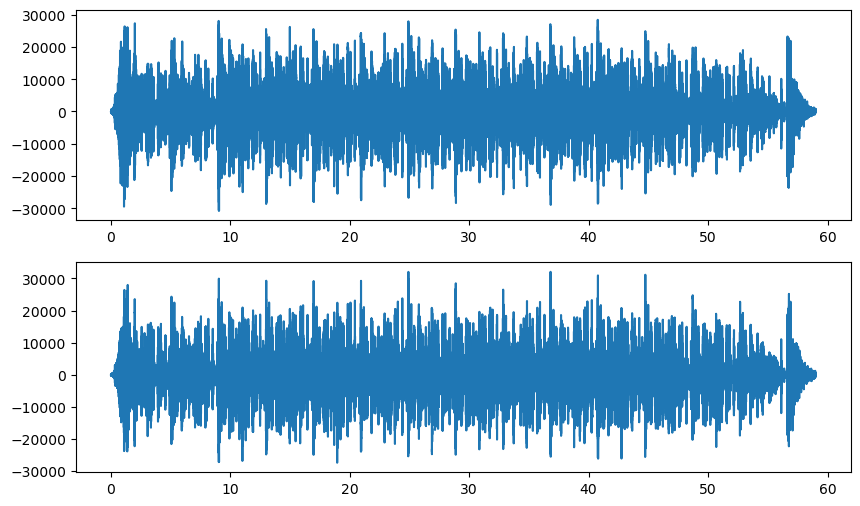

In [10]:
'''
    多声道绘制波形
'''
def DrawWaveFile(wave_file):
    f = wave.open(wav_file)
    channels = f.getnchannels()
    f.close()

    if channels == 1:
        DrawWavFile_mono(wav_file)
    else:
        DrawWAVFile_stereo(wav_file)
#多声道
print('=====================多声道======================')
wav_file = '../../sample-files/SAMPLE AUDIO FILES/WAV_10MG.wav'
DrawWaveFile(wav_file)
#前面的代码执行完之后再执行下面的

#单声道
print('=====================单声道=====================')
wav_down_file = '../../sample-files/SAMPLE AUDIO FILES/down.wav'
DrawWaveFile(wav_down_file)

In [1]:
'''
   1. 产生音频文件:以随机数生成音频文件,随机数介于(-32767,32767)
'''
import wave
import numpy as np
import IPython.display as ipd

SAMPLE_RATE = 44100
DURATION = 1.0

# 计算样本数量
num_samples = int(SAMPLE_RATE * DURATION)

# 生成随机音频样本
data = np.random.randint(-32767, 32767, size=num_samples, dtype=np.int16)

# 写入 WAV 文件
with wave.open('../../sample-files/audio/random.wav', 'w') as wave_file:
    wave_file.setnchannels(1)  # 单声道
    wave_file.setsampwidth(2)  # 16 位 = 2 字节
    wave_file.setframerate(SAMPLE_RATE)
    wave_file.writeframes(data.tobytes())  # 写入二进制数据

# 播放 WAV 文件
audio = ipd.Audio('../../sample-files/audio/random.wav')
ipd.display(audio)



In [5]:
'''
    2.取得音频文件的属性
'''
import wave

f = wave.open('../../sample-files/audio/random.wav','rb')
print(f'取样频率={f.getframerate()},帧数={f.getnframes()}\n'
      f'声道={f.getnchannels()},精度={f.getsampwidth()}\n'
      f'文件秒数={f.getnframes()/(f.getframerate() * f.getnchannels()):.2f}')


取样频率=44100,帧数=44100
声道=1,精度=2
文件秒数=1.00


In [9]:
'''
3.双声道文件转为单声道
'''
import numpy as np

wave_file = '../../sample-files/SAMPLE AUDIO FILES/WAV_1MG.wav'

with wave.open(wave_file,'r') as f:
    #字符串转换整数
    signal = f.readframes(-1)
    signal = np.frombuffer(signal,np.int16)

    #为每个声道准备一个list
    channels = [[] for channel in range(f.getnchannels())]

    #将数据放入每个list
    for index,datum in enumerate(signal):
        channels[index % len(channels)].append(datum)

    sampleRate = f.getframerate() #取样频率
    samplewidth = f.getsampwidth()

wav_file_out = '../../sample-files/SAMPLE AUDIO FILES/wav_1mg_mono.wav'
obj = wave.open(wav_file_out,'w')
obj.setnchannels(1)
obj.setsampwidth(samplewidth)
obj.setframerate(sampleRate)
for data in channels[0]:
    obj.writeframesraw(data)
obj.close()

f = wave.open(wav_file_out,'rb')
print(f'取样频率={f.getframerate()},帧数={f.getnframes()}\n'
      f'声道={f.getnchannels()},精度={f.getsampwidth()}\n'
      f'文件秒数={f.getnframes()/(f.getframerate() * f.getnchannels()):.2f}')

取样频率=8000,帧数=268237
声道=1,精度=2
文件秒数=33.53
